In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Dataset
df = pd.read_csv('/content/census-income.csv')

EDA - Exploratory Data Analysis

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
df.rename(columns={'Unnamed: 14':'Income'}, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  Income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [14]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.duplicated().sum().sum()

np.int64(24)

In [10]:
df.drop_duplicates(inplace=True)

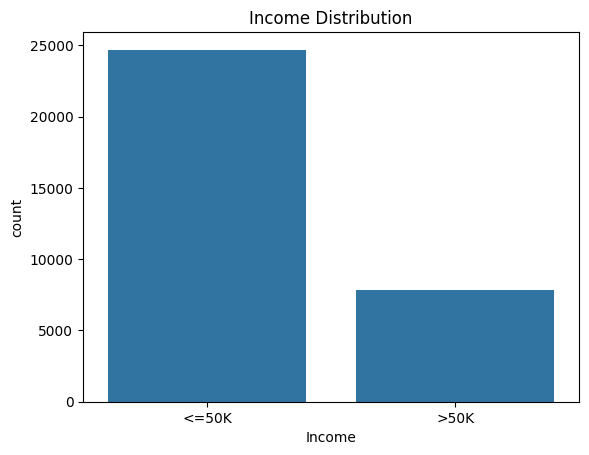

In [15]:
sns.countplot(x='Income', data=df)
plt.title('Income Distribution')
plt.show()

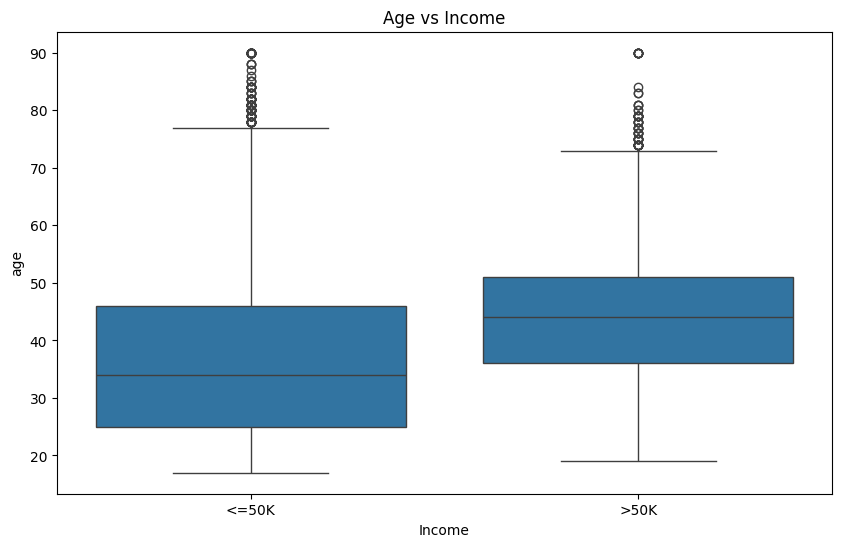

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Income', y='age', data=df)
plt.title('Age vs Income')
plt.show()

In [17]:
#Handle missing values
df.dropna(inplace=True)

In [18]:
#Encode Categorical Variables
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [19]:
#Train-Test Split
X = df.drop('Income', axis=1)
y = df['Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
#Train Different Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.8248309772587584
[[4604  301]
 [ 839  764]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4905
           1       0.72      0.48      0.57      1603

    accuracy                           0.82      6508
   macro avg       0.78      0.71      0.73      6508
weighted avg       0.81      0.82      0.81      6508


Model: Decision Tree
Accuracy: 0.8111555009219422
[[4280  625]
 [ 604  999]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4905
           1       0.62      0.62      0.62      1603

    accuracy                           0.81      6508
   macro avg       0.75      0.75      0.75      6508
weighted avg       0.81      0.81      0.81      6508


Model: Random Forest
Accuracy: 0.8578672403196066
[[4578  327]
 [ 598 1005]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      49

'''
📌 Conclusion

In this project, we explored the Census Income dataset to predict whether an individual earns more than $50,000 per year using various machine learning models. Here's a summary of our findings:

We performed thorough data preprocessing by handling missing values, encoding categorical variables, and standardizing numerical features.

We conducted exploratory data analysis (EDA) to understand the distribution of features and identify relationships with the income class.

We trained and evaluated multiple models including:

Logistic Regression

Decision Tree

Random Forest

Support Vector Machine (SVM)

After evaluating all models using accuracy, precision, recall, and F1-score:

Random Forest achieved the best overall performance, with an accuracy of 85.79% and a balanced F1-score of 0.68.

Although SVM had the highest precision for classifying high-income individuals, Random Forest provided better recall and generalization.

✅ Therefore, Random Forest is the recommended model for deployment in real-world applications for income classification.

'''